## Table of contents

* [1.The dot product](#1)
* [1.1 Algebraic definition of the dot product](#1.1)
* [1.2. Understanding linear separability ](#1.2)
* [1.3 Hyperplanes](#1.3)
* [1.4. Understanding the hyperplane equation  ](#1.4)
* [1.5.Classifying data with a hyperplane](#1.5)
* [1.6. How can we find a hyperplane (separating the data or not)?](#1.6)
* [2.The perceptron:](#2)
* [2.1. The Perceptron learning algorithm](#2.1)
* [2.2. Understanding the update rule.](#2.2)
* [2.3. Convergence of the algorithm](#2.3)
* [2.4 Understanding the limitations of the PLA](#2.4)
* [2.5. Summary ](#2.5)
* [References](#r)

## Grattiude:

This chapter is possible due to the first and second References and thanks [Alexandre Kowalczyk](https://github.com/alexandrekow) for sharing such valuable knowledge for free.

**Note 1**: I had included the free [License](https://github.com/SyncfusionSuccinctlyE-Books/Support-Vector-Machines-Succinctly/blob/master/LICENSE)  in this folder.

**Note 2**: Accept for the PLA (Perceptron Learning Algorithm) and Data set,Rest of the Python code for visualization and plotting  is developed by [Anil R.Sarode](https://www.linkedin.com/in/anil-sarode-350556170/)  

## 1.The dot product   <a class="anchor" id="1"></a>

The dot product is an operation performed on two vectors that returns a number. A number is sometimes called a scalar; that is why the dot product is also called a **scalar product**.

People often have trouble with the dot product because it seems to come out of nowhere. What is important is that it is an operation performed on **two vectors** and that its result gives us some insights into how the two vectors relate to each other. There are two ways to think about the dot product: geometrically and algebraically.

### Geometric definition of the dot product

Geometrically, the **dot product** is the product of the Euclidean magnitudes of the two vectors
and the cosine of the angle between them. 

Below is simple python program which draw/plot(Figure 1) two vectors $[3,5]$ and $[8,2]$ and the angle between the those two vectors.

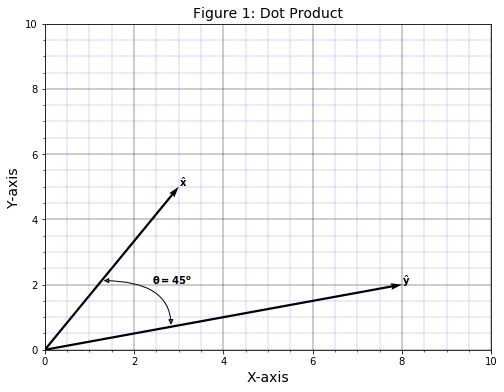

In [1]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, 5], [0, 0, 8, 2]])
X, Y, U, V = zip(*soa)
plt.figure(figsize=(8, 6))

ax = plt.gca()
q=ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,width=0.005)
p1 = np.cos(np.pi/4), np.sin(np.pi/4)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.draw()

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.4', color='black')
# Customize the minor grid

ax.grid(which='minor', linestyle=':', linewidth='0.4', color='blue')
plt.title('Figure 1: Dot Product',fontsize=14)
plt.xlabel('X-axis',fontsize=14)
plt.ylabel('Y-axis',fontsize=14)
plt.annotate(r"$\mathbf{\hat{x}}$", xy=(3, 5))
plt.annotate(r"$\mathbf{\hat{y}}$", xy=(8, 2))
plt.annotate(r'$\mathbf{\theta=45^{o}}$ ', xy=(2.4, 2))
#plt.annotate(r'$\mathbf{\alpha=15^{o}}$ ', xy=(1.5, 0.1))
plt.annotate("", xy=(1.8*p1[0], 3*p1[1]), xytext=(4*p1[0], 1*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.show()


This means that if we have two vectors,$\mathbf{\hat{x}}$ and $\mathbf{\hat{y}}$, with an angle ${\theta}$ between them as  shown in the above plot , their dot product is

$$
\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =\|x\|\ \|y\|\cos(\theta)
$$

By looking at this formula, we can see that the dot product is strongly influenced by the angle $\theta$:


*  When ${\theta}=0^{o}$, we have $\cos(\theta)=1$ and $\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =\|x\|\ \|y\|$
*  When ${\theta}=90^{o}$, we have $\cos(\theta)=0$ and $\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =0$
*  When ${\theta}=180^{o}$, we have $\cos(\theta)=-1$ and $\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =-\|x\|\ \|y\|$

Keep this in mind—it will be useful later when we study the Perceptron learning algorithm in next section.

We can write a simple Python function to compute the dot product using this definition and use it to get the value of the dot product in Figure 1.

In [2]:
import math
import numpy as np
def geometric_dot_product(x,y, theta):
    x_norm = np.linalg.norm(x)
    print(x_norm)
    y_norm = np.linalg.norm(y)
    print(y_norm)
    return x_norm * y_norm * math.cos(math.radians(theta))

However, we need to know the value of to be able to compute the dot product.

In [3]:
theta = 45
x = [3,5]
y = [8,2]
print(geometric_dot_product(x,y,theta))

5.830951894845301
8.246211251235321
34.00000000000001


### 1.1 Algebraic definition of the dot product  <a class="anchor" id="1.1"></a>


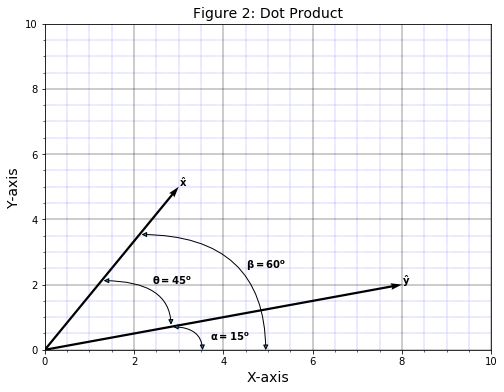

In [4]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, 5], [0, 0, 8, 2]])
X, Y, U, V = zip(*soa)
plt.figure(figsize=(8, 6))

ax = plt.gca()
q=ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,width=0.005)
p1 = np.cos(np.pi/4), np.sin(np.pi/4)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.draw()

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.4', color='black')
# Customize the minor grid

ax.grid(which='minor', linestyle=':', linewidth='0.4', color='blue')
plt.title('Figure 2: Dot Product',fontsize=14)
plt.xlabel('X-axis',fontsize=14)
plt.ylabel('Y-axis',fontsize=14)
plt.annotate(r"$\mathbf{\hat{x}}$", xy=(3, 5))
plt.annotate(r"$\mathbf{\hat{y}}$", xy=(8, 2))
plt.annotate(r'$\mathbf{\theta=45^{o}}$ ', xy=(2.4, 2))
plt.annotate(r'$\mathbf{\alpha=15^{o}}$ ', xy=(3.7, 0.3))
plt.annotate(r'$\mathbf{\beta=60^{o}}$ ', xy=(4.5, 2.5))
plt.annotate("", xy=(1.8*p1[0], 3*p1[1]), xytext=(4*p1[0], 1*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.annotate("", xy=(4*p1[0], 1*p1[1]), xytext=(5*p1[0], -0.1*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.annotate("", xy=(3*p1[0], 5*p1[1]), xytext=(7*p1[0], -0.1*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))

plt.show()


In Figure 2, we can see the relationship between the three angles $\theta$ , $\beta$(beta), and $\alpha$(alpha):

$$
\theta=\beta-\alpha
$$

This means computing $cos(\theta)$ is the same as computing $cos(\beta-\alpha)$

Using the difference identity for cosine we get:

$$
cos(\theta)=\cos(\beta-\alpha)=\cos(\beta)\cos(\alpha)+\sin(\beta)sin(\alpha)
$$

$$
cos(\theta)=\frac{x_1}{\|x\|}\frac{y_1}{\|y\|}+\frac{x_2}{\|x\|}\frac{y_2}{\|y\|}
$$

$$
cos(\theta)=\frac{x_1y_1+x_2y_2}{\|x\|\|y\|}
$$

If we multiply both sides by ${\|x\|\|y\|}$ we get:

$$
{\|x\|\|y\|}\cos(\theta)={x_1}{y_1}+{x_2}{y_2}
$$

we already know that 

$$
\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =\|x\|\ \|y\|\cos(\theta)
$$

This means the dot product can also be written:
$$
\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} ={x_1}{y_1}+{x_2}{y_2}
$$

or

$$
\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =\sum_{i=1}^{2}({x_i}{y_i} )
$$

In a more general way, for -dimensional vectors, we can write:

$$
\mathbf{\hat{x}} \cdot \mathbf{\hat{y}} =\sum_{i=1}^{n}({x_i}{y_i} )
$$

This formula is the algebraic definition of the dot product.


In [5]:
def dot_product(x,y):
    result = 0
    for i in range(len(x)):
        result = result + x[i]*y[i]
    return result

This definition is advantageous because **we do not have to know the angle to compute the dot product**. We can write a function `dot_product` to compute its value and get the same result as with the geometric definition below code.

In [6]:
x = [3,5]
y = [8,2]
print(dot_product(x,y))

34


Of course, we can also use the dot function provided by **numpy**.

In [7]:
import numpy as np
x = np.array([3,5])
y = np.array([8,2])
print(np.dot(x,y)) 

34


We spent quite some time understanding what the dot product is and how it is computed. This is because the dot product is a fundamental notion that you should be comfortable with in order to figure out what is going on in SVMs. We will now see another crucial aspect, linear separability.

###  1.2. Understanding linear separability <a class="anchor" id="1.2"></a>

In this section, we will use a simple example to introduce linear separability.Which we already saw in the [Logistic Regression or Classification](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Logistic_Regression/Logistic%20Regression%20or%20Classification.ipynb).

####  Linearly separable data

Imagine you are a wine producer. You sell wine coming from two different production batches:

*  One high-end wine costing $\$145$ a bottle.
*  One common wine costing $\$8$ a bottle.

Recently, you started to receive complaints from clients who bought an expensive bottle. They
claim that their bottle contains the cheap wine. This results in a major reputation loss for your
company, and customers stop ordering your wine.

###  Using alcohol-by-volume to classify wine

You decide to find a way to distinguish the two wines. You know that one of them contains more alcohol than the other, so you open a few bottles, measure the alcohol concentration, and plot it

In [8]:
import random

def sample_floats(low, high, k=20):
    """ Return a k-length list of unique random floats
        in the range of low <= x <= high
    """
    result = []
    seen = set()
    for i in range(k):
        x = random.uniform(low, high)
        while x in seen:
            x = random.uniform(low, high)
        seen.add(x)
        result.append(x)
    return result

V1=sample_floats(10.5,12.8)
V2=sample_floats(13.5,16)
Y=np.zeros(20)



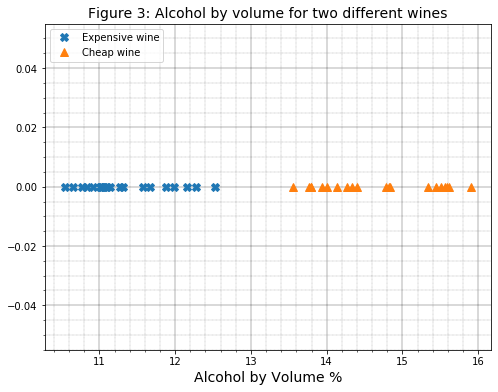

In [9]:
fig = plt.figure(figsize=(8,6))
plt.plot(V1,Y,'X',V2,Y,'^',markersize=8)

plt.xlabel('Alcohol by Volume %',fontsize=14)
plt.title('Figure 3: Alcohol by volume for two different wines',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Expensive wine", "Cheap wine"], loc="upper left")
plt.show()

In **Figure 3** is an example of linearly separable data, you can clearly see that the expensive wine contains less alcohol than the cheap one. In fact, you can find a point that separates the data into two groups. This data is said to be linearly separable. For now, you decide to measure the alcohol concentration of your wine automatically before filling an expensive bottle. If it is greater than 13 percent, the production chain stops and one of your employee must make an inspection. This improvement dramatically reduces complaints, and your business is flourishing again.

This example is too easy—in reality, data seldom works like that. In fact, some scientists really measured alcohol concentration of wine, and the plot they obtained is shown in **Figure 4**. This is an example of non-linearly separable data. Even if most of the time data will not be linearly separable, it is fundamental that you understand linear separability well. In most cases, we will start from the linearly separable case (because it is the simpler) and then derive the nonseparable case.

Similarly, in most problems, we will not work with only one dimension, as in Figure 6. Real-life problems are more challenging than toy examples, and some of them can have thousands of dimensions, which makes working with them more abstract. However, its abstractness does not make it more complex. Most examples in this book will be two-dimensional examples. They are simple enough to be easily visualized, and we can do some basic geometry on them, which will allow you to understand the fundamentals of SVMs.

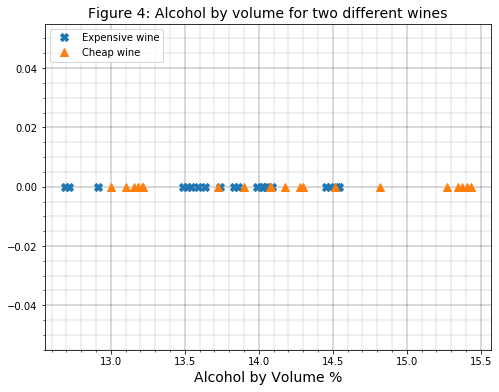

In [10]:
V3=sample_floats(12.6,14.8)
V4=sample_floats(13,15.5)

fig = plt.figure(figsize=(8,6))
plt.plot(V3,Y,'X',V4,Y,'^',markersize=8)

plt.xlabel('Alcohol by Volume %',fontsize=14)
plt.title('Figure 4: Alcohol by volume for two different wines',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Expensive wine", "Cheap wine"], loc="upper left")
plt.show()

In our example of Figure 3, there is only **one dimension**: that is, each data point is represented by a single number. **When there are more dimensions, we will use vectors to represent each data point.** Every time we add a dimension, the object we use to separate the data changes. Indeed, while we can separate the data with a single point in Figure 4, as soon as we go into two dimensions we need a line (a set of points), and in three dimensions we need a plane (which is also a set of points).

To summarize, data is linearly separable when:

* In one dimension, you can find a **point** separating the data (Figure 3).
* In two dimensions, you can find a **line** separating the data (Figure 5).
* In three dimensions, you can find a **plane** separating the data (Figure 6)

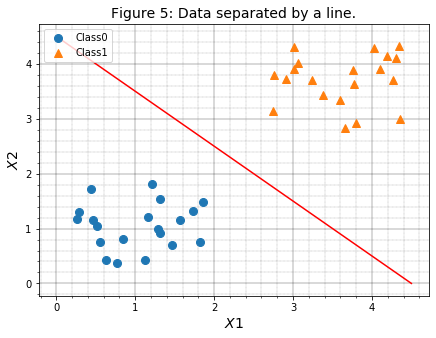

In [11]:
v1=[4.5,0] # x_1= 4.5 and x_2=0
v2=[0,4.5] # x_1= 0.0 and x-

f1=sample_floats(0.1,2)
f2=sample_floats(0.1,2)
f3=sample_floats(2.5,4.5)
f4=sample_floats(2.5,4.5)

fig = plt.figure(figsize=(7,5))
plt.plot(f1,f2,'o',f3,f4,'^',markersize=8)
plt.plot(v1,v2,'r')
plt.title('Figure 5: Data separated by a line.',fontsize=14)

plt.xlabel(r'$X1$',fontsize=14)
plt.ylabel(r'$X2$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left")
plt.show()

Before plotting the plane you can get the idea of what is [Normal vector from plane equation](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/normal-vector-from-plane-equation).

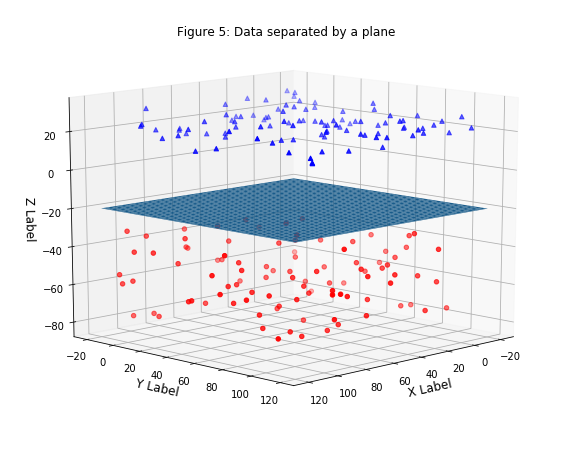

In [12]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -80, -30), ('b', '^', 30, 15)]:
    
    xs = randrange(n, -20, 120)
    ys = randrange(n, -20, 120)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

    
point  = np.array([20, 20, -20])
normal = np.array([0, 0, 1])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-20,120), range(-20,120))    

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z)

plt.title('Figure 5: Data separated by a plane')
ax.set_xlabel('X Label',fontsize=12)
ax.set_ylabel('Y Label',fontsize=12)
ax.set_zlabel('Z Label',fontsize=12)
ax.view_init(12.5, 45)
plt.show()

Similarly, when data is non-linearly separable, we cannot find a separating point, line, or plane. Figure 6 show examples of non-linearly separable data in two dimension,which we already saw in the [Logistic Regression or Classification](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Logistic_Regression/Logistic%20Regression%20or%20Classification.ipynb). and Figure 7 show examples of non-linearly separable data in three dimensions.

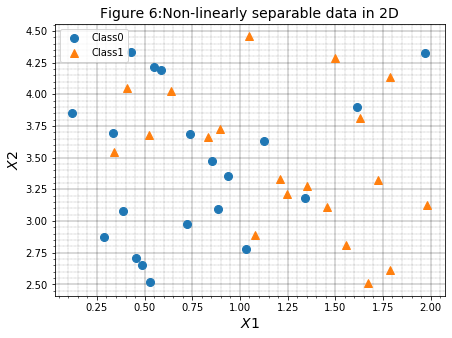

In [13]:

f1=sample_floats(0.1,2)
f2=sample_floats(0.1,2)
f3=sample_floats(2.5,4.5)
f4=sample_floats(2.5,4.5)

fig = plt.figure(figsize=(7,5))
plt.plot(f1,f3,'o',f2,f4,'^',markersize=8)
plt.title('Figure 6:Non-linearly separable data in 2D',fontsize=14)

plt.xlabel(r'$X1$',fontsize=14)
plt.ylabel(r'$X2$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left")
plt.show()

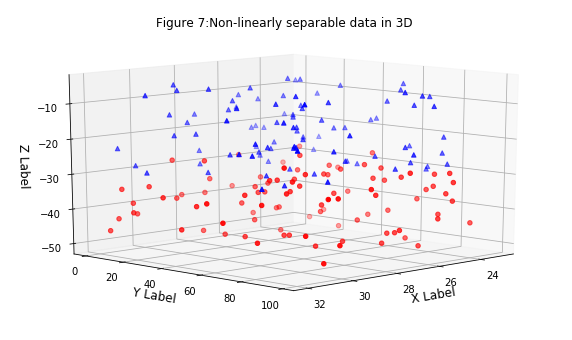

In [14]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

plt.title('Figure 7:Non-linearly separable data in 3D ')
ax.set_xlabel('X Label',fontsize=12)
ax.set_ylabel('Y Label',fontsize=12)
ax.set_zlabel('Z Label',fontsize=12)
ax.view_init(12.5, 45)
plt.show()


### 1.3 Hyperplanes <a class="anchor" id="1.3"></a>

What do we use to separate the data when there are more than three dimensions? We use what is called a **hyperplane**.

#### What is a hyperplane?

In geometry, a **hyperplane** is a subspace of one dimension less than its ambient space.In two dimensional plane the line is a one dimensional entity. Similarly in 3-Dimensional space the plane is two dimensional entity.  

This definition, albeit true, is not very intuitive. Instead of using it, we will try to understand what a hyperplane is by first studying what a line is.

If you recall mathematics from school, you probably learned that a line has an equation of the form $y=ax+b$ , that the constant $a$ is known as the slope, and that intercepts the y-axis. There are several values of for which this formula is true, and we say that the set of the solutions is a line.

What is often confusing is that if you study the function $f(x)=ax+b$ in a calculus course, you will be studying a function with one variable.

However, it is important to note that the linear equation $y=ax+b$ has two variables, respectively $y$ and $x$, and we can name them as we want.

For instance, we can rename $y$ as $x_2$ and x as $x_1$ , and the equation becomes:$x_2=ax_1+b$.

This is equivalent to $ax1-x2+b=0$ .

If we define the two-dimensional vectors $\mathbf{x}=(x_1,x_2)$ and $\mathbf{w}=(a,-1)$, we obtain another notation for the equation of a line (where is $\mathbf{w\cdot x}$ the dot product of $\mathbf w$ and $\mathbf x$):

$$
\mathbf{w \cdot x} +b=0
$$

What is nice with this last equation is that it uses vectors. Even if we derived it by using two dimensional vectors, it works for vectors of any dimensions. It is, in fact, the equation of a **hyperplane**.

From this equation, we can have another insight into what a hyperplane is: it is the set of points satisfying $\mathbf{w \cdot x}+b=0$. And, if we keep just the essence of this definition: **a hyperplane is a set
of points.**

If we have been able to deduce the hyperplane equation from the equation of a line, it is because a line is a hyperplane. You can convince yourself by reading the definition of a hyperplane again. You will notice that, indeed, a line is a two-dimensional space surrounded by a plane that has three dimensions. Similarly, points and planes are hyperplanes, too.



### 1.4. Understanding the hyperplane equation  <a class="anchor" id="1.4"></a>

We derived the equation of a hyperplane from the equation of a line. Doing the opposite is interesting, as it shows us more clearly the relationship between the two.

Given vectors $\mathbf{w}=(w_{0},w_{1})$,$\mathbf{x}=(x,y)$ and $b$,we can define the hyperplane having the equation:

$$
\mathbf{w \cdot x} + b=0
$$

This is equivalent to:
$$
w_{0}x+w_{1}y+b=0
$$

$$
w_{1}y=-w_{0}x-b
$$

We isolate $y$ to get 
$$
y=-\frac{w_{0}}{w_{1}}x-\frac{b}{w_{1}}
$$

if we define $a$ and $c$:

$$
a=-\frac{w_0}{w_1}\hspace{0.5cm} and \ c=\frac{-b}{w_{1}}
$$

$$
y=ax+c
$$

We see that the bias $c$ of the line equation is only equal to the bias $b$ of the hyperplane equation when $w_1=-1$. So you should not be surprised if $b$ is not the intersection with the vertical axis when you see a plot for a hyperplane (this will be the case in our next example). Moreover, if $w_{0}$ and $w_{1}$ and have the same sign, the slope $a$ will be negative.

### 1.5.Classifying data with a hyperplane <a class="anchor" id="1.5"></a>


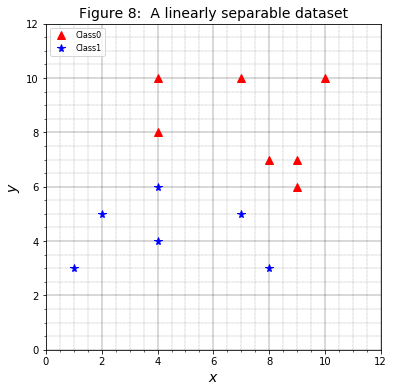

In [15]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt

X, y = get_dataset(ls.get_training_examples)

a=X[0:7,0]
b=X[0:7,1]
c=X[8:14,0]
d=X[8:14,1]

x_l= np.arange(0,12,1)
y_l= np.arange(0,12,1)

fig = plt.figure(figsize=(6,6))

plt.plot(a,b,"r^",c,d,"b*",markersize=8)
plt.title('Figure 8:  A linearly separable dataset',fontsize=14)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


Given the linearly separable data of Figure 8, we can use a hyperplane to perform binary classification.

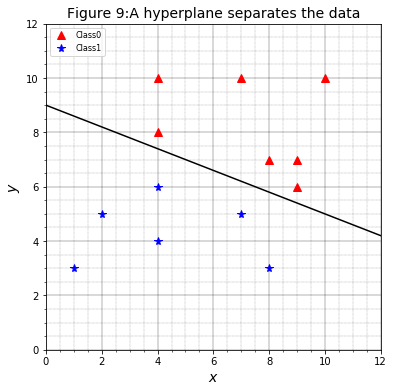

In [16]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt

X, Y = get_dataset(ls.get_training_examples)

a1=X[0:7,0]
b1=X[0:7,1]
a2=X[8:14,0]
b2=X[8:14,1]

x= np.arange(0,13,1)
#y= np.arange(0,12,1)

w=[0.4,1]
b=-9
a= -w[0]/w[1]
c=-b/w[1]

y=a*x+c

fig = plt.figure(figsize=(6,6))

plt.plot(a1,b1,"r^",a2,b2,"b*",markersize=8)
plt.plot(x,y,'k')
plt.title('Figure 9:A hyperplane separates the data',fontsize=14)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


For instance, with the vector $w=(0.4,1.0)$ and $b=-9$ we get the hyperplane in Figure 9.

We associate each vector $\mathbf{x_i}$ with a label $y_{i}$ , which can have the value $+1$ or $-1$ (respectively the triangles and the stars in Figure 9)

we define the hypothesis function $h$:

$$
\begin{equation}
  h(\mathbf x_i)=\begin{cases}
    +1, & \text{if $\mathbf{w \cdot x_{i}} + b \geq 0 $}.\\
    -1, & \text{if $\mathbf{w \cdot x_{i}} + b < 0 $}.
  \end{cases}
\end{equation}
$$

Which is equivalent to 

$$
h(\mathbf x_{i})= sign (\mathbf{w \cdot x_{i}})
$$

It uses the position of with respect $\mathbf{x}$ to the hyperplane to predict a value for the label . Every data point on one side of the hyperplane will be assigned a label $y$, and every data point on the other side will be assigned the other label.

For instance, for $x=(8,7)$,$\mathbf{x}$ is above the hyperplane. When we do the calculation, we get
$\mathbf{w \cdot x} + b=0.4\times +1\times 7-9=1.2$, which is positive, so $h(x)=+1$ .

Similarly, for $x=(1,3)$,$\mathbf{x}$ is below the hyperplane. When we do the calculation, we get
$\mathbf{w \cdot x} + b=0.4\times +1\times 3-9=-5.6$, which is positive, so $h(x)=-1$.

Because it uses the equation of the hyperplane, which produces a linear combination of the values, the function $h$, is called a **linear classifier**. 

With one more trick, we can make the formula of $h$ even simpler by replacing the $b$ constant.First, we add a component $x_{0}=1$ to the vector $x_i=({x_{1},x_{2},\ldots,x_{n}})$. We get the vector $\mathbf{\hat{x_{i}}}=({x_{0},x_{1},x_{2},\ldots,x_{n}})$ (it reads “$\mathbf{\hat{x_{i}}}$ hat” because we put a hat on $\mathbf{x_{i}}$). Similarly, we add a component $w_{0}$ to the vector $w=({w_{1},w_{2},\ldots,w_{n}})$ , which becomes $\mathbf{\hat{w}}=({w_{0},w_{1},w_{2},\ldots,w_{n}})$.

**Note:** In the rest of the book, we will call a vector to which we add an artificial
coordinate an **augmented vector.**

When we use augmented vectors, the hypothesis function becomes:

$$
h(\mathbf{\hat{x_{i}}})=sign(\mathbf{\hat{w}}\cdot \mathbf{\hat{x_{i}}})
$$

If we have a hyperplane that separates the data set like the one in Figure $9$, by using the hypothesis function $h$ , we are able to predict the label of every point perfectly. The main question is: **how do we find such a hyperplane?**


### 1.6. How can we find a hyperplane (separating the data or not)?<a class="anchor" id="1.6"></a>

Recall that the equation of the hyperplane is $\mathbf{w}\cdot \mathbf{x}$ in augmented form. It is important to
understand that the only value that impacts the shape of the hyperplane is $\mathbf{w}$. To convince you, we can come back to the two-dimensional case when a hyperplane is just a line. When we create the augmented three-dimensional vectors, we obtain $\mathbf{x}=(x_0,x_1,x_2)$ and $w=(b,a,-1)$.You can see that the vector $\mathbf{w}$ contains both $a$ and $b$, which are the two main components defining the look of the line. Changing the value of $\mathbf{w}$ gives us different hyperplanes (lines), as shown in Figure $10$.

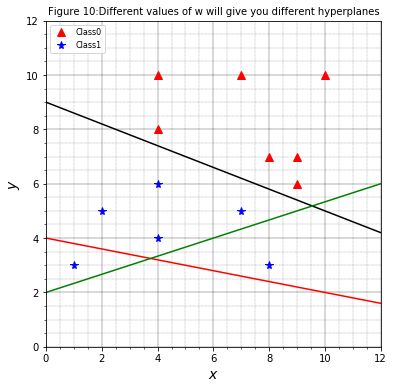

In [17]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt

X, Y = get_dataset(ls.get_training_examples)

e=X[0:7,0]
f=X[0:7,1]
g=X[8:14,0]
h=X[8:14,1]

x= np.arange(0,13,1)
#y= np.arange(0,12,1)

w0=[0.4,1]
b=-9
a= -w0[0]/w0[1]
c=-b/w0[1]

y=a*x+c

w1=[0.2,1]
b1=-4
a1= -w1[0]/w1[1]
c1=-b1/w1[1]

y1=a1*x+c1


w2=[-1,3]
b2=-6
a2= -w2[0]/w2[1]
c2=-b2/w2[1]

y2=a2*x+c2

fig = plt.figure(figsize=(6,6))

plt.plot(e,f,"r^",g,h,"b*",markersize=8)
plt.plot(x,y,'k')
plt.plot(x,y1,'r')
plt.plot(x,y2,'g')
plt.title('Figure 10:Different values of w will give you different hyperplanes',fontsize=10)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


After introducing vectors and linear separability, we learned what a hyperplane is and how we can use it to classify data. We then saw that the goal of a learning algorithm trying to learn a linear classifier is to find a hyperplane separating the data. Eventually, we discovered that finding a hyperplane is equivalent to finding a vector $\mathbf {w}$.

We will now examine which approaches learning algorithms use to find a hyperplane that
separates the data. Before looking at how **SVMs** do this, we will first look at one of the simplest
learning models: the Perceptron.

## 2.The perceptron:<a class="anchor" id="2"></a>

The Perceptron is an algorithm invented in 1957 by Frank Rosenblatt, a few years before the first SVM. It is widely known because it is the building block of a simple neural network: the multilayer perceptron. The goal of the Perceptron is to find a hyperplane that can separate a linearly separable data set. Once the hyperplane is found, it is used to perform binary classification.

In short the Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.
Perceptron is a linear classifier (binary). Also, it is used in supervised learning. It helps to classify the given input data. But how the heck it works ?

The perceptron consists of 4 parts.

* 1.Input values or One input layer
* 2.Weights and Bias
* 3.Net sum
* 4 [Activation function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

**Note:** The Neural Networks work the same way as the perceptron. So, if you want to know how neural network works, learn how perceptron works.

![](fig0.png)
$$\mathbf{Figure 11}$$

Given augmented vectors $\mathbf{x_{i}}=({x_{0},x_{1},x_{2},\ldots,x_{n}})$ and  $\mathbf{w}=({w_{0},w_{1},w_{2},\ldots,w_{n}})$., the Perceptron uses the same hypothesis function we saw in the previous section to classify a data point $\mathbf{x_i}$:

$$
h(\mathbf x_{i})= sign (\mathbf{w \cdot x_{i}})
$$


### 2.1. The Perceptron learning algorithm <a class="anchor" id="2.1"></a>

Given a training set $\mathcal{D}$ of $m n$-dimensional training examples $(x_{i},y_{j})$ , the **Perceptron Learning Algorithm (PLA)** tries to find a hypothesis function $h$ that predicts the label of every
correctly.

The hypothesis function of the Perceptron is $h(\mathbf x)= sign (\mathbf{w \cdot x}) $ , and we saw that $\mathbf{w \cdot x_{i}}$ is just the equation of a hyperplane. We can then say that the set $\mathcal{H}$ of hypothesis functions is the set of $n-1$ dimensional hyperplanes ($n-1$ because a hyperplane has one dimension less than its ambient space).we know what is set  $\mathcal{H}$ of [hypothesis function](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Prerequisites%20for%20SVM/Prerequisites%20for%20SVM-Support%20Vector%20Machine%20.ipynb) or [Activation function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

What is important to understand here is that the only unknown value is $\mathbf{w}$.It means that the goal
of the algorithm is to find a value for $\mathbf{w}$. You find $\mathbf{w}$; you have a hyperplane. There is an infinite number of hyperplanes (you can give any value to $\mathbf{w}$), so there is an infinity of hypothesis
functions.

This can be written more formally this way:

Given a training set: $\mathcal{D}=\{(\mathcal{x_{i}},y_{i})\mid x_{i}\in R^{n},y_{i}\in \{-1,1\} \}_{i=1}^{i=m}$ and a set $\mathcal{H}$ of hypothesis function.

Find $h\in \mathcal{H}$ such that $ h(\mathbf{x_{i}})=y_{i}$ for every $\mathbf{x_{i}}$

This equivalent to :

Given a training set: $\mathcal{D}=\{(\mathcal{x_{i}},y_{i})\mid x_{i}\in R^{n},y_{i}\in \{-1,1\} \}_{i=1}^{i=m}$ and a set $\mathcal{H}$ of hypothesis function.

Find $\mathcal{w}=({w_{0},w_{1},w_{2},\ldots,w_{n}})$ such that $ sign (\mathbf{w \cdot x_{i}})=y_{i}$ for every $\mathbf{x_{i}}.$


The PLA is a very simple algorithm, and can be summarized this way:
1. Start with a random hyperplane (defined by a vector $\mathbf{w}$ ) and use it to classify the data.
2. Pick a misclassified example and select another hyperplane by updating the value of $\mathbf{w}$, hoping it will work better at classifying this example (this is called the **update rule**).
3. Classify the data with this new hyperplane.
4. Repeat steps 2 and 3 until there is no misclassified example.

Once the process is over, you have a hyperplane that separates the data.
The algorithm is shown in Code below:

In [18]:
import numpy as np

W=[]
I=[]

def perceptron_learning_algorithm(X, y):
    w = np.random.rand(3)   # can also be initialized at zero.
    misclassified_examples = predict(hypothesis, X, y, w)

    while misclassified_examples.any():
        x, expected_y = pick_one_from(misclassified_examples, X, y)
        w = w + x * expected_y  # update rule
        W.append(w)
        misclassified_examples = predict(hypothesis, X, y, w)

    return w

def hypothesis(x, w):
    return np.sign(np.dot(w, x))


# Make predictions on all data points
# and return the ones which are misclassified.
def predict(hypothesis_function, X, y, w):
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w)
    misclassified = X[y != predictions]
    I.append(len(misclassified)) # get the count for misclassified examples for each iteration
    return misclassified

# Pick one misclassified example randomly
# and return it with its expected label.
def pick_one_from(misclassified_examples, X, y):
    np.random.shuffle(misclassified_examples)
    x = misclassified_examples[0]
    index = np.where(np.all(X == x, axis=1))
    return x, y[index]

Let us look at the code in detail.

The **`perceptron_learning_algorithm`** uses several functions as shown in the above code. The `hypothesis` function is just $h(\mathbf{x})$ written in Python code; as we saw before, it is the function that returns the label $y_{i}$ predicted for an example $x_{i}$ when classifying with the hyperplane defined by $\mathbf{w}$ . The predict function applies the hypothesis for every example and returns the ones that
are misclassified.

Once we have made predictions with `predict`, we know which examples are misclassified, so we use the function `pick_one_from` to select one of them randomly.

We then arrive at the heart of the algorithm: the **update rule**. For now, just remember that it changes the value of $\mathbf{w}$. Why it does this will be explained in detail next. We once again use the **predict** function, but this time, we give it the updated $\mathbf{}w$ . It allows us to see if we have classified all data points correctly, or if we need to repeat the process until we do.

below code demonstrates how we can use the **`perceptron_learning_algorithm`** function with a toy data set. Note that we need $\mathbf{w}$ the $\mathbf{x}$ and vectors to have the same dimension, so we convert every vector into an augmented vector $\mathbf{x}$ before giving it to the function


In [19]:
# See Appendix A for more information about the dataset
from succinctly.datasets import get_dataset, linearly_separable as ls

np.random.seed(88) # 99 77 66 55 111 122 

X, y = get_dataset(ls.get_training_examples)

# transform X into an array of augmented vectors.
X_augmented = np.c_[np.ones(X.shape[0]), X]

w = perceptron_learning_algorithm(X_augmented, y)

print(w)

[-44.35244895   1.50714969   5.52834138]


### 2.2. Understanding the update rule. <a class="anchor" id="2.2"></a>

Why do we use this particular update rule? Recall that we picked a misclassified example at random. Now we would like to make the Perceptron correctly classify this example. To do so, we decide to update the vector $\mathbf{w}$. The idea here is simple. Since the sign of the dot product between $\mathbf{w}$ and $\mathbf{x}$ is incorrect, by changing the angle between them, we can make it correct:


* If the predicted label is $1$ (Which is incorrect), the angle between and is smaller than $90^{o}$ , and we want to increase it.
* If the predicted label is $-1$(Which is incorrect), the angle between and is bigger than $90^{0}$ , and we want to decrease it

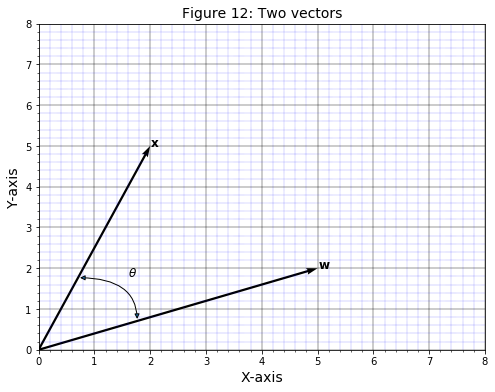

In [20]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 5], [0, 0, 5, 2]])
X, Y, U, V = zip(*soa)
plt.figure(figsize=(8, 6))

ax = plt.gca()
q=ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,width=0.005)
p1 = np.cos(np.pi/4), np.sin(np.pi/4)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
plt.draw()

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.4', color='black')
# Customize the minor grid

ax.grid(which='minor', linestyle=':', linewidth='0.4', color='blue')
plt.title('Figure 12: Two vectors',fontsize=14)
plt.xlabel('X-axis',fontsize=14)
plt.ylabel('Y-axis',fontsize=14)
plt.annotate(r"$\mathbf{x}$", xy=(2, 5),fontsize=12)
plt.annotate(r"$\mathbf{w}$", xy=(5, 2),fontsize=12)
plt.annotate(r'${\theta}$ ', xy=(1.6, 1.8),fontsize=12)
#plt.annotate(r'$\mathbf{\alpha=15^{o}}$ ', xy=(1.5, 0.1))
plt.annotate("", xy=(1*p1[0], 2.5*p1[1]), xytext=(2.5*p1[0], 1*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.show()


Let’s see what happens with two vectors,$\mathbf{w}$ and $\mathbf{x}$ , having an angle $\theta$ between (Figure 12). On the one hand, adding them creates a new vector ,$\mathbf{w}+\mathbf{x}$ and the angle $\beta$ between $\mathbf{x}$ and $ \mathbf{w+x}$ is smaller than $\theta$(Figure 13).

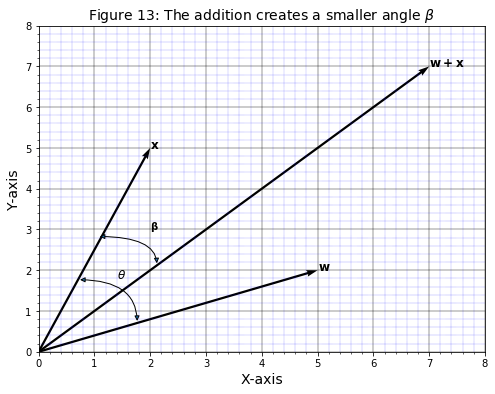

In [21]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 5], [0, 0, 5, 2],[0, 0, 7, 7]])
X, Y, U, V = zip(*soa)
# print(X) 
# print(Y)
# print(U)
# print(V)
plt.figure(figsize=(8, 6))

ax = plt.gca()
q=ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,width=0.005)
p1 = np.cos(np.pi/4), np.sin(np.pi/4)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
plt.draw()

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.4', color='black')
# Customize the minor grid

ax.grid(which='minor', linestyle=':', linewidth='0.4', color='blue')
plt.title(r'Figure 13: The addition creates a smaller angle $\beta$',fontsize=14)
plt.xlabel('X-axis',fontsize=14)
plt.ylabel('Y-axis',fontsize=14)
plt.annotate(r"$\mathbf{x}$", xy=(2, 5),fontsize=12)
plt.annotate(r"$\mathbf{w}$", xy=(5, 2),fontsize=12)
plt.annotate(r"$\mathbf{w+x}$", xy=(7, 7),fontsize=12)
plt.annotate(r'${\theta}$ ', xy=(1.4, 1.8),fontsize=12)
plt.annotate(r'$\mathbf{\beta}$ ', xy=(2,3))
plt.annotate("", xy=(1.5*p1[0], 4*p1[1]), xytext=(3*p1[0], 3*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.annotate("", xy=(1*p1[0], 2.5*p1[1]), xytext=(2.5*p1[0], 1*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.show()

On the other hand, subtracting them creates a new vector $\mathbf{w-x}$ , and the angle $\beta$ between $\mathbf{x}$ and $\mathbf{w-x}$ is bigger than $\theta$ (Figure 14)

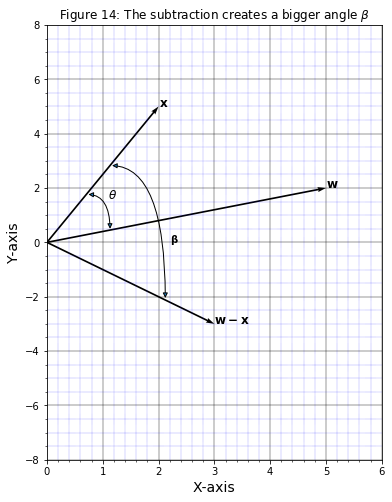

In [22]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 5], [0, 0, 5, 2],[0, 0, 3, -3]])
X, Y, U, V = zip(*soa)
# print(X) 
# print(Y)
# print(U)
# print(V)
plt.figure(figsize=(6, 8))

ax = plt.gca()
q=ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,width=0.005)
p1 = np.cos(np.pi/4), np.sin(np.pi/4)
ax.set_xlim([0, 6])
ax.set_ylim([-8, 8])
plt.draw()

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.4', color='black')
# Customize the minor grid

ax.grid(which='minor', linestyle=':', linewidth='0.4', color='blue')
plt.title(r'Figure 14: The subtraction creates a bigger angle $\beta$',fontsize=12)
plt.xlabel('X-axis',fontsize=14)
plt.ylabel('Y-axis',fontsize=14)
plt.annotate(r"$\mathbf{x}$", xy=(2, 5),fontsize=12)
plt.annotate(r"$\mathbf{w}$", xy=(5, 2),fontsize=12)
plt.annotate(r"$\mathbf{w-x}$", xy=(3, -3),fontsize=12)
plt.annotate(r'${\theta}$ ', xy=(1.1, 1.6),fontsize=12)
plt.annotate(r'$\mathbf{\beta}$ ', xy=(2.2,0))
plt.annotate("", xy=(1.6*p1[0], 4*p1[1]), xytext=(3*p1[0], -3*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.annotate("", xy=(1*p1[0], 2.5*p1[1]), xytext=(1.6*p1[0], 0.6*p1[1]),arrowprops=dict(arrowstyle="<|-|>",connectionstyle="angle3"))
plt.show()

We can use these two observations to adjust the angle:
    
* If the **predicted label** is $1$, the angle is smaller than $90^{o}$ . We want to increase the angle, so we set $\mathbf{w-x}$.
*  If the **predicted label** is $-1$, the angle is bigger than $90^{o}$. We want to decrease the angle, so we set $\mathbf{w+x}$.

As we are doing this only on misclassified examples, when the predicted label has a value, the

expected label is the opposite. This means we can rewrite the previous statement:

* If the **expected label** is $-1$: We want to increase the angle, so we set $\mathbf{w-x}$.
* If the **expected label** is $+1$: We want to decrease the angle, so we set $\mathbf{w+x}$.

When translated into Python it gives us below Code , and we can see that it is strictly equivalent to Code given next , which is the update rule.

In [23]:
def update_rule(expected_y, w, x):
    if expected_y == 1:
        w = w + x
    else:
        w = w - x
    return w

In [24]:
def update_rule(expected_y, w, x):
    w = w + x * expected_y
    return w

We can verify that the update rule works as we expect by checking the value of the hypothesis
before and after applying it

In [25]:
import numpy as np

def hypothesis(x, w):
    return np.sign(np.dot(w, x))

x = np.array([1, 2, 7])
expected_y = -1
w = np.array([4, 5, 3])

print(hypothesis(w, x)) # The predicted y is 1.

w = update_rule(expected_y, w, x) # we apply the update rule.

print(hypothesis(w, x)) # The predicted y is -1.

1
-1


Note that the update rule does not necessarily change the sign of the hypothesis for the example the first time. Sometimes it is necessary to apply the update rule several times before it happens as shown in below Code. This is not a problem, as we are looping across misclassified examples, so we will continue to use the update rule until the example is correctly classified. What matters here is that each time we use the update rule, we change the value of the angle in the right direction (increasing it or decreasing it)

In [26]:
import numpy as np

x = np.array([1,3])
expected_y = -1
w = np.array([5, 3])

print(hypothesis(w, x)) # The predicted y is 1.

w = update_rule(expected_y, w, x) # we apply the update rule.

print(hypothesis(w, x)) # The predicted y is 1.

w = update_rule(expected_y, w, x) # we apply the update rule once again.

print(hypothesis(w, x)) # The predicted y is -1.

1
1
-1


Also note that sometimes updating the value of $\mathbf{w}$ for a particular example $\mathbf{x}$ changes the hyperplane in such a way that another example $\mathbf{x*}$ previously correctly classified becomes misclassified. So, the hypothesis might become worse at classifying after being updated. This is illustrated in Figure 15, which shows us the number of classified examples at each iteration step. One way to avoid this problem is to keep a record of the value of  $\mathbf{w}$ before making the update and use the updated  $\mathbf{w}$ only if it reduces the number of misclassified examples. This modification of the PLA is known as the **Pocket algorithm** (because we keep  $\mathbf{w}$ in our pocket).

Text(0, 0.5, 'Missclassified count')

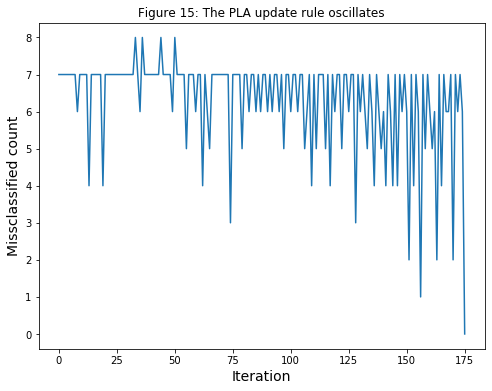

In [27]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(0,len(I),1),I)
plt.title(r'Figure 15: The PLA update rule oscillates',fontsize=12)

plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Missclassified count',fontsize=14)

### 2.3 Convergence of the algorithm <a class="anchor" id="2.3"></a>

We said that we keep updating the vector with the update rule until there is no misclassified point. But how can we be so sure that will ever happen? Luckily for us, mathematicians have studied this problem, and we can be very sure because the Perceptron convergence theorem guarantees that if the two sets $P$ and $N$ (of positive and negative examples respectively) are linearly separable, the vector $\mathbf{w}$ is updated only a finite number of times, which was first proved by Novikoff in 1963 (Rojas, 1996)

Before going ahead and understand the limitation of the PLA ,We can see  how are the different updated values of the parameters $\mathbf{w}$  fit the hyper plane and miss-classified the data and at last fit perfectly using following code.


In [28]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


X, Y = get_dataset(ls.get_training_examples)

W
N=len(W)
W1=np.zeros((np.shape(W)))
for i,w in enumerate (W):
    W1[i]=w
    

a1=X[0:7,0]
b1=X[0:7,1]
a2=X[8:14,0]
b2=X[8:14,1]

x= np.arange(0,13,1)
#y= np.arange(0,12,1)

#w=[0.4,1]

def plot_hyperplane(w_range):
    j=w_range
    b=W1[j,0]
    a= -W1[j,1]/W1[j,2]
    c=-b/W1[j,2]
    y=a*x+c

    fig = plt.figure(figsize=(6,6))

    plt.plot(a1,b1,"r^",a2,b2,"b*",markersize=8)
    plt.plot(x,y,'k')
    plt.title('Figure 16:A hyperplane separates the data',fontsize=14)

    plt.xlabel(r'$x$',fontsize=14)
    plt.ylabel(r'$y$',fontsize=14)
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
    # Customize the minor grid

    plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
    plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
    plt.ylim(0,12)
    plt.xlim(0,12)
    plt.show()

# create a slider
interact(plot_hyperplane, w_range =(0,N-1,1))

interactive(children=(IntSlider(value=87, description='w_range', max=174), Output()), _dom_classes=('widget-in…

<function __main__.plot_hyperplane(w_range)>

In the above PLA algorithm in [2.1 The Perceptron learning algorithm](#2.1) change the seed value in `np.random.seed(88)` and see you will get the different hyperplane which separate the data. 

### 2.4 Understanding the limitations of the PLA <a class="anchor" id="2.4"></a>

One thing to understand about the PLA algorithm is that because weights are randomly initialized and misclassified examples are randomly chosen, it is possible the algorithm will return a different hyperplane each time we run it. Figure 17 shows the result of running the PLA on the same dataset four times. As you can see, the PLA finds four different hyperplanes.

In [29]:
import numpy as np

#W=[]
#I=[]

def perceptron_learning_algorithm(X, y):
    w = np.random.rand(3)   # can also be initialized at zero.
    misclassified_examples = predict(hypothesis, X, y, w)

    while misclassified_examples.any():
        x, expected_y = pick_one_from(misclassified_examples, X, y)
        w = w + x * expected_y  # update rule
       # W.append(w)
        misclassified_examples = predict(hypothesis, X, y, w)

    return w

def hypothesis(x, w):
    return np.sign(np.dot(w, x))


# Make predictions on all data points
# and return the ones which are misclassified.
def predict(hypothesis_function, X, y, w):
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w)
    misclassified = X[y != predictions]
   # I.append(len(misclassified)) # get the count for misclassified examples for each iteration
    return misclassified

# Pick one misclassified example randomly
# and return it with its expected label.
def pick_one_from(misclassified_examples, X, y):
    np.random.shuffle(misclassified_examples)
    x = misclassified_examples[0]
    index = np.where(np.all(X == x, axis=1))
    return x, y[index]



[-52.84300816   3.70221004   5.26147827]
[-30.32772144   1.4880784    3.82549517]
[-61.08089097   3.6421956    6.75371223]
[-80.90689171   4.97165592   8.48385998]


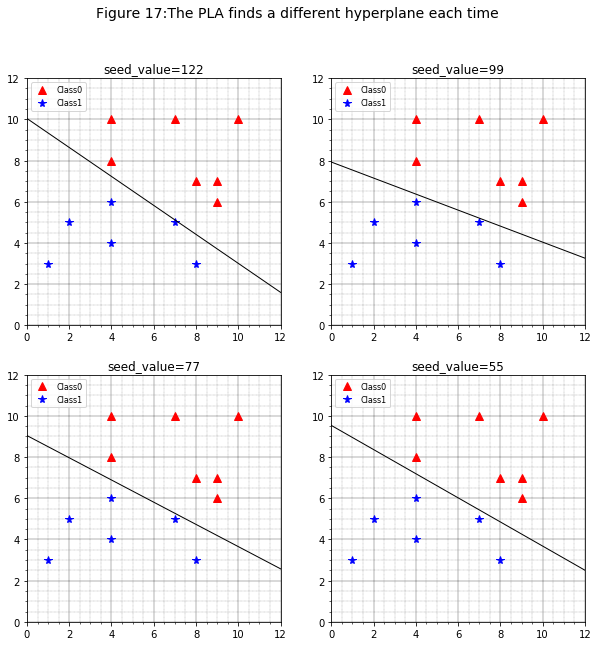

In [30]:
from succinctly.datasets import get_dataset, linearly_separable as ls

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Figure 17:The PLA finds a different hyperplane each time", fontsize=14)

for k, seed_value in enumerate([122,99,77,55]):
    np.random.seed(seed_value) # 99 77 66 55 111 122 
    ax1=plt.subplot(2, 2, k + 1)
    X, y = get_dataset(ls.get_training_examples)
    
    a1=X[0:7,0]
    b1=X[0:7,1]
    a2=X[8:14,0]
    b2=X[8:14,1]

    # transform X into an array of augmented vectors.
    X_augmented = np.c_[np.ones(X.shape[0]), X]

    w = perceptron_learning_algorithm(X_augmented, y)
    print(w)

    b=w[0]
    a= -w[1]/w[2]
    c=-b/w[2]
    y=a*x+c

    plt.plot(a1,b1,"r^",a2,b2,"b*",markersize=8)
    plt.plot(x,y,'k',linewidth=1)

    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
    # Customize the minor grid

    plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
    plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
    ax1.set_title("seed_value={}".format(seed_value))
    plt.ylim(0,12)
    plt.xlim(0,12)
plt.show()
    
    

At first, this might not seem like a problem. After all, the four hyperplanes perfectly classify the data, so they might be equally good, right? However, when using a machine learning algorithm such as the PLA, our goal is not to find a way to classify perfectly the data we have right now. Our goal is to find a way to correctly classify new data we will receive in the future.

Let us introduce some terminology to be clear about this. To train a model, we pick a **sample** of existing data and call it the **training set**. We train the model, and it comes up with a hypothesis (a hyperplane in our case). We can measure how well the hypothesis performs on the training set: we call this the **in-sample error (also called training error)**. Once we are satisfied with the hypothesis, we decide to use it on unseen data (the test set) to see if it indeed learned something. We measure how well the hypothesis performs on the **test set**, and we call this the **out-of-sample error (also called the generalization error).** To know more about the [generalization error](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Prerequisites%20for%20SVM/Prerequisites%20for%20SVM-Support%20Vector%20Machine%20.ipynb).

Our goal is to have the smallest out-of-sample error.

In the case of the PLA, all hypotheses in Figure 17 perfectly classify the data: their in-sample error is zero. But we are really concerned about their out-of-sample error. We can use a test set such as the one in Figure 18 to check their out-of-sample errors.



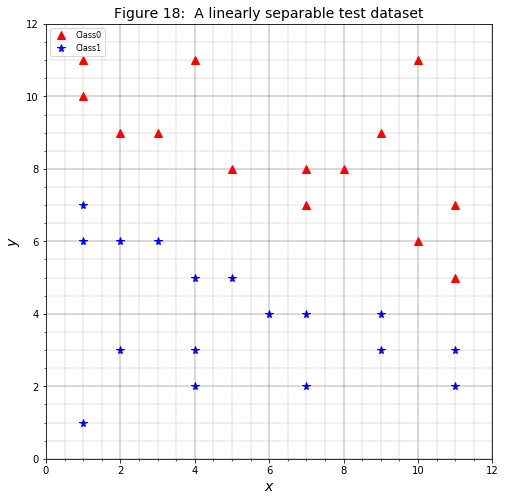

In [31]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt

X1, y1 = get_dataset(ls.get_test_examples)

a=X1[0:14,0]
b=X1[0:14,1]
c=X1[15:32,0]
d=X1[15:32,1]

x_l= np.arange(0,12,1)
y_l= np.arange(0,12,1)

fig = plt.figure(figsize=(8,8))

plt.plot(a,b,"r^",c,d,"b*",markersize=8)
plt.title('Figure 18:  A linearly separable test dataset',fontsize=14)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
plt.ylim(0,12)
plt.xlim(0,12)
plt.show()



As you can see in Figure 19, the two hypotheses on the right, despite perfectly classifying the training dataset, are making errors with the test dataset.

Now we better understand why it is problematic. When using the Perceptron with a linearly separable dataset, we have the guarantee of finding a hypothesis with zero in-sample error, but we have no guarantee about how well it will **generalize** to unseen data (if an algorithm generalizes well, its out-of-sample error will be close to its in-sample error). How can we choose a hyperplane that generalizes well? As we will see in the next chapter, this is one of the goals of SVMs.

[-56.16515785   3.1047961    5.74464048]
[-76.90665594   4.89094301   7.4767345 ]
[-62.32772144   2.4880784    7.82549517]
[-69.35244895   2.50714969   8.52834138]


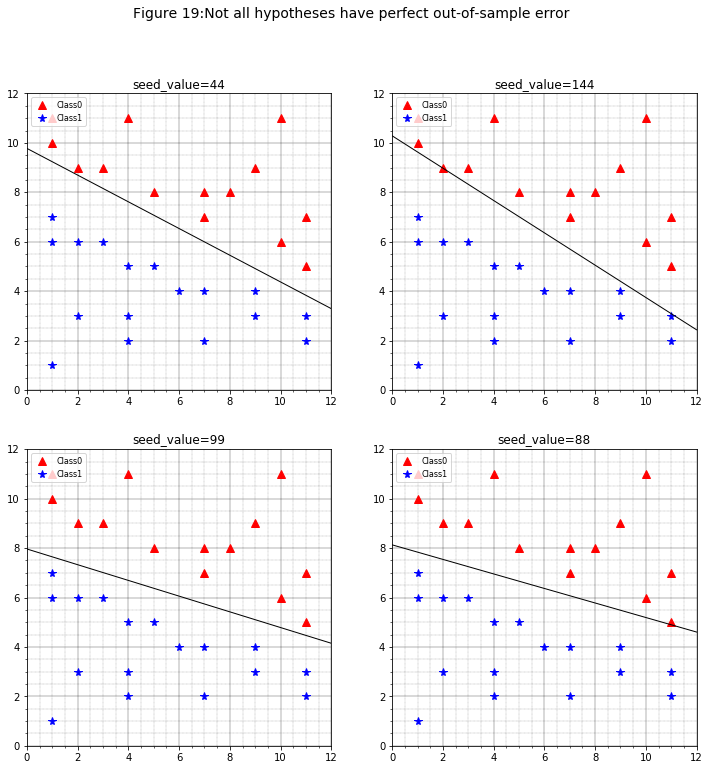

In [32]:
# See Appendix A for more information about the dataset
from succinctly.datasets import get_dataset, linearly_separable as ls


#w = perceptron_learning_algorithm(X_augmented, y)

fig = plt.figure(figsize=(12, 12))
fig.suptitle("Figure 19:Not all hypotheses have perfect out-of-sample error", fontsize=14)

for k, seed_value in enumerate([44,144,99,88]):
    np.random.seed(seed_value) # 99 77 66 55 111 122 
    ax1=plt.subplot(2, 2, k + 1)
    X1, y1 = get_dataset(ls.get_test_examples)
    
    a1=X1[0:14,0]
    b1=X1[0:14,1]
    a2=X1[15:32,0]
    b2=X1[15:32,1]
    # transform X into an array of augmented vectors.
    X_augmented = np.c_[np.ones(X1.shape[0]), X1]

    w = perceptron_learning_algorithm(X_augmented, y1)
    print(w)

    b=w[0]
    a= -w[1]/w[2]
    c=-b/w[2]
    y=a*x+c

    plt.plot(a1,b1,"r^",a2,b2,"b*",markersize=8)
    plt.plot(x,y,'k',linewidth=1)

    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
    # Customize the minor grid

    plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
    plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
    ax1.set_title("seed_value={}".format(seed_value))
    plt.ylim(0,12)
    plt.xlim(0,12)
plt.show()
    
    

### 2.5. Summary <a class="anchor" id="2.5"></a>

In this chapter, we have learned what a Perceptron is. We then saw in detail how the Perceptron Learning Algorithm works and what the motivation behind the update rule is. After learning that the PLA is guaranteed to converge, we saw that not all hypotheses are equal, and that some of them will generalize better than others. Eventually, we saw that the Perceptron is unable to select which hypothesis will have the smallest out-of-sample error and instead just picks one hypothesis having the lowest in-sample error at random.

## References <a class="anchor" id="r"></a>

* [1] [SUPPORT VECTOR MACHINES SUCCINCTLY By Alexandre Kowalczyk.](https://docplayer.net/85962521-By-alexandre-kowalczyk-foreword-by-daniel-jebaraj.html) 
* [2] [svm-succinctly](https://bitbucket.org/syncfusiontech/svm-succinctly/src/master/)
* [3] [What the Hell is Perceptron?](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)